In [1]:
# 0.0 - imports

import os
import openpyxl as xl
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 0.1 - create database filepath

filename = "KBOB.xlsx"
folder = "database"

directory = os.getcwd().rsplit('\\',1)[0]
filepath = os.path.join(directory, folder, filename)

print(f"Filepath: \n" + filepath)

Filepath: 
e:\Github Repo\LCADataReader\database\KBOB.xlsx


In [3]:
# 0.2 - open database file

try:
    wb = xl.load_workbook(filepath)
    print("Loaded database file successfully.")
except:
    print("Error opening database file.")

Loaded database file successfully.


In [4]:
# explore database
worksheets = wb.sheetnames
for index, sheet in enumerate(worksheets):
    print(index, sheet)

0 Erläuterung  Explication
1 Baumaterialien Matériaux
2 Gebäudetechnik Technique
3 Energie Énergie
4 Transporte Transports
5 Entsorgung Déchets


In [27]:
# extract data

# A. select which sheets to extract
selection_indices = [1]
selected_worksheets = [worksheets[i] for i in selection_indices]

# B. for each sheet find main chunk

for index, sheet in enumerate(selected_worksheets):
    ws = wb[sheet]
    print("SHEET: ", index, ws)
    
    type_memory = ["None"]
    
    wb_type = []

    sheet_description = []
    for row in ws.iter_rows(min_row=0, max_col=30, max_row=10000):
        #print("ROW: ", row)
        
        row_type_keys = []
        for cell in row:
            #print("CELL:        ", cell)
            #print("CELL_VALUE:  ", cell.value)
            
            # Get cell type
            cell_type = None
            if(cell.value == None): 
                cell_type = 'None'
            else:
                cell_type = type(cell.value)
            #print("CELL_TYPE:   ", cell_type)

            # Check with type memory and add if not defined
            exists_in_memory = cell_type in type_memory
            if(exists_in_memory):
                pass
            else:
                #print("not defined! defining...")
                type_memory.append(cell_type)

            cell_type_key = type_memory.index(cell_type)

            
            row_type_keys.append(str(cell_type_key))
        #print(row[0].row, "".join(row_type_keys))
        #print(row_type)
        row_description = str(1)+"".join(row_type_keys)
        sheet_description.append(row_description)

print(len(sheet_description))
sheet_description_set = set(sheet_description)
print(len(sheet_description_set))

occurances = []
for item in sheet_description_set:
    occurances.append(sheet_description.count(item))

names = []
for item in sheet_description_set:
    names.append(item)
# C. get column names

# D. get row groups

# E. get row items

SHEET:  0 <Worksheet "Baumaterialien Matériaux">
10000
118


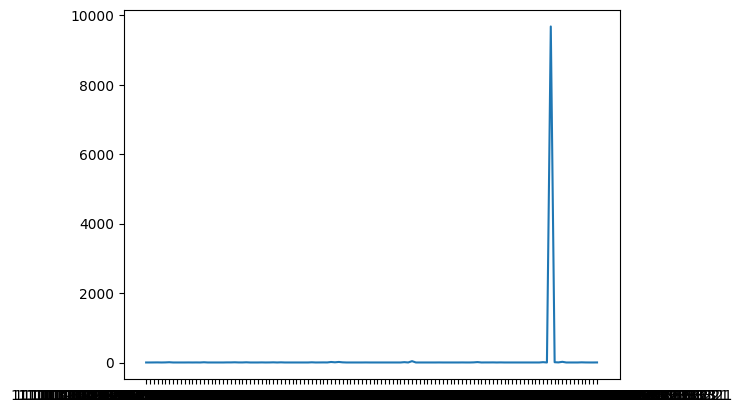

In [28]:
plt.plot(names, occurances)

# plot does not look correct?